# Lab 4
## Pre class checklist
Have you...

* Completed the Lab 3 prelab worksheet?
* Set up a new GitHub branch with this worksheet and the dataset (path on canvas: Files/datasets/BTSFlights2024/T_T100D_MARKET_US_CARRIER_ONLY_2025.csv ; OR check out the labs page and it will be linked there) inside it (name the branch `ca4`)?
* Downloaded VSCode?

**How you will be graded**

This activity is out of 10 points. You will be graded on three things: completion, clear documentation, and correctness of your process.

* *Completion (4pts)*: This is solely whether you attempted and completed all portions of the computational assignment.
* *Documentation (4pts)*: Write comments above your code, describing what it does to demonstrate that you understand what the code is doing.
* *Correctness (2pts)*: Does your code run and produce the correct output?


# Playground!

In this section you will be given a set of tasks to complete on your own, and you will have to figure out how to do them using the resources provided (videos, documentation, etc). This way you can learn at your own pace and also get used to looking up documentation and learning how to use new tools on your own.

Note: We will have periodic check-ins through the class, just to make sure everyone atleast finishes a part of the activity before moving on!

The very first task is to import the required packages, this lab we will work with ***arrays***, ***networks***, ***dataframes***, and ***plots***. (Hint: Packages are `numpy`, `networkx`, `polars`, and `matplotlib.pyplot`; Can you use comments to tell me what package is used to work with what?)

Try importing the required libraries below (dont forget you can use the `as` keyword to give them a shorter alias):

In [ ]:
import polars as pl # Data slicing.
import matplotlib.pyplot as plt # Data showing.
import networkx as nx # Data networking.
import numpy as np # Number magic.

df = pl.read_csv('bts-flights.csv')
df

PASSENGERS,UNIQUE_CARRIER,UNIQUE_CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,YEAR
f64,str,str,i64,str,i64,str,i64
0.0,"""1BQ""","""Eastern Airlines f/k/a Dynamic…",10540,"""BED""",12339,"""IND""",2025
0.0,"""1BQ""","""Eastern Airlines f/k/a Dynamic…",10747,"""BRO""",13198,"""MCI""",2025
0.0,"""1BQ""","""Eastern Airlines f/k/a Dynamic…",10792,"""BUF""",13198,"""MCI""",2025
0.0,"""1BQ""","""Eastern Airlines f/k/a Dynamic…",10821,"""BWI""",12478,"""JFK""",2025
0.0,"""1BQ""","""Eastern Airlines f/k/a Dynamic…",11066,"""CMH""",11995,"""GSO""",2025
…,…,…,…,…,…,…,…
80868.0,"""DL""","""Delta Air Lines Inc.""",10397,"""ATL""",13204,"""MCO""",2025
81227.0,"""DL""","""Delta Air Lines Inc.""",13204,"""MCO""",10397,"""ATL""",2025
81317.0,"""DL""","""Delta Air Lines Inc.""",13204,"""MCO""",10397,"""ATL""",2025


Great! Now we will import our data into python. To do this we can use `pl.read_csv`, this function takes in the filepath as an argument and creates a dataframe. See the example below:

Assuming the file is stored in the same folder as this lab notebook.

```python
df = pl.read_csv("data_to_read.csv")
print(df)
```
Try importing the flight data file you downloaded into python!

Sidenote: 

**What is a filepath?** 

The file path for a document is the sequence of directories that the computer must navigate to find the item. The easiest way to do this is with the relative file path; where the file exists relative to the script you are running. Some examples: (1) For a file that exists in the same folder as your script, the filepath is simply `"data_to_read.csv"`, (2) for a file in the directory above, the filepath is `"../data_to_read.csv"`, and (3) for a file in a sub-directory of the directory that you're currently in (say it's `data`), the filepath is `"data/data_to_read.csv."` We can combine (2) and (3); for example `"../data/flight_data/data_to_read.csv"` describes navigating up one directory, then going in the `data` directory, then the `flight_data` subfolder where the data is located.

**Some info about the dataset**

This dataset is a yearly snapshot of flights among all commercial airports in the United States in 2025. Data include number of passengers (PASSENGERS), the unique carrier name (UNIQUE_CARRIER_NAME), the origin airport code (ORIGIN), and the destination airport code (DEST). Data come from Bureau of Transportation Statistics. “T-100 Domestic Market” https://www.transtats.bts.gov/

In [ ]:
# Already did this.

Amazing! We now have out data loaded into python. We can look at the size of this datafram using `df.shape`, the size of this dataframe comes out to `(80302, 8)` which means that we have a whopping `80000` rows! Today we won't be working with such a large dataset, so the next goal is to filter the dataset to a manageable size.

To do that we will use the `filter` function in polars. See the example below:

```python
df_filtered = df.filter((pl.col("UNIQUE_CARRIER_NAME") == "JetBlue Airways") & (pl.col("PASSENGERS") <= 500))
print(df_filtered)
```
Here, we created a new dataframe `df_filtered` and filtered for only `JetBlue Airways` with `<= 500` (less than or equal to 500) passengers.

Sidenote: For more clarity on `filter`, in Polars `df.filter` (where "df" gets replaced with the name of your dataframe) is how we choose to keep only the rows that satisfy our criteria. Its equivalent to asking our DataFrame a `yes-or-no` question for each row and only keeping those that satisfy the `"yes"` answer.

Try filtering for an airline of your choice or just copy the example!


In [7]:
df_filtered = df.filter((pl.col("UNIQUE_CARRIER_NAME") == "JetBlue Airways") & (pl.col("PASSENGERS") <= 500))
df_filtered

PASSENGERS,UNIQUE_CARRIER,UNIQUE_CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,YEAR
f64,str,str,i64,str,i64,str,i64
0.0,"""B6""","""JetBlue Airways""",10721,"""BOS""",12391,"""ISP""",2025
2.0,"""B6""","""JetBlue Airways""",12478,"""JFK""",12478,"""JFK""",2025
20.0,"""B6""","""JetBlue Airways""",12953,"""LGA""",12478,"""JFK""",2025
28.0,"""B6""","""JetBlue Airways""",12197,"""HPN""",12451,"""JAX""",2025
32.0,"""B6""","""JetBlue Airways""",10732,"""BQN""",14843,"""SJU""",2025
…,…,…,…,…,…,…,…
335.0,"""B6""","""JetBlue Airways""",10721,"""BOS""",10849,"""BZN""",2025
358.0,"""B6""","""JetBlue Airways""",12478,"""JFK""",12197,"""HPN""",2025
412.0,"""B6""","""JetBlue Airways""",12892,"""LAX""",11618,"""EWR""",2025


Now we will create a graph from our filtered dataset, for now we will only work with undirected graphs without multi-edges. This is because we only care about connectivity between airports. 

Note: On your own you can also try making a directed graph and doing the rest of the activities using that!

So how do we create a graph from our dataframe? Have a look at the example below:

```python
G = nx.Graph()
G.add_nodes_from(df_filtered['<Col Name>'])
G.add_nodes_from(df_filtered['<Col Name>'])

node_dict = {node: i for i, node in enumerate(list(G.nodes()))} # This is a complicated line of code, if you noticed our nodes would be strings of characters (like 'ATL') and not numbers. So when we go on to convet this graph into a adjacency matrix, we wont be able to just use the node name from edge list. A solution is to create a dictionary where each key is the node name and value is a number (imagine its an integer id for each airport). For this excercise please copy this code to create your graph.

edge_list = df_filtered['<Col Name>', '<Col Name>'].iter_rows()

G.add_edges_from(edge_list)
nx.draw(G)
```
Note: For a directed graph you will need to create `nx.DiGraph()`.

Today we want to focus on some more matrix stuff, so you can just copy the above code and use it to create your graph. But you will have to fill the column names yourself and comment this code for grading!

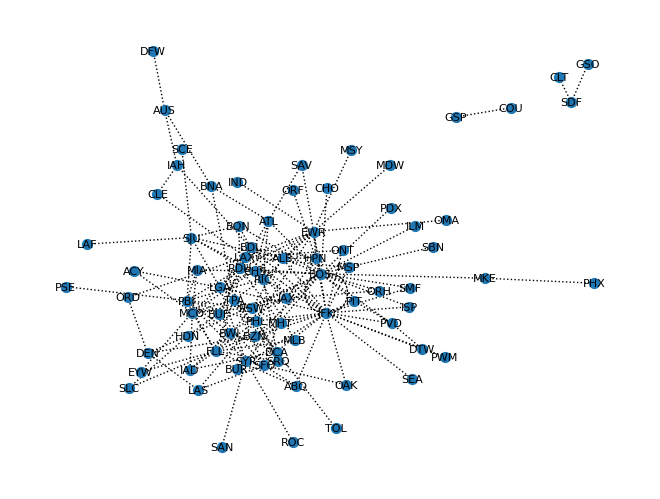

In [16]:
G = nx.Graph()
G.add_nodes_from(df_filtered['ORIGIN'])
G.add_nodes_from(df_filtered['DEST'])

node_dict = {node: i for i, node in enumerate(list(G.nodes()))} # This is a complicated line of code, if you noticed our nodes would be strings of characters (like 'ATL') and not numbers. So when we go on to convet this graph into a adjacency matrix, we wont be able to just use the node name from edge list. A solution is to create a dictionary where each key is the node name and value is a number (imagine its an integer id for each airport). For this excercise please copy this code to create your graph.

edge_list = df_filtered['ORIGIN', 'DEST'].iter_rows()

G.add_edges_from(edge_list)
nx.draw(G, nx.spring_layout(G, k=0.3), with_labels = True, node_size = 50, font_size = 8, style = 'dotted')

In [31]:
[(i,j) for i,j in G.edges]

[('BOS', 'ISP'),
 ('BOS', 'MIA'),
 ('BOS', 'ATL'),
 ('BOS', 'CHO'),
 ('BOS', 'RDU'),
 ('BOS', 'SYR'),
 ('BOS', 'PIT'),
 ('BOS', 'SBN'),
 ('BOS', 'BQN'),
 ('BOS', 'MKE'),
 ('BOS', 'SMF'),
 ('BOS', 'ILM'),
 ('BOS', 'ALB'),
 ('BOS', 'HDN'),
 ('BOS', 'PVD'),
 ('BOS', 'ORF'),
 ('BOS', 'EWR'),
 ('BOS', 'BWI'),
 ('BOS', 'PDX'),
 ('BOS', 'RSW'),
 ('BOS', 'ORH'),
 ('BOS', 'BZN'),
 ('JFK', 'JFK'),
 ('JFK', 'LGA'),
 ('JFK', 'PIT'),
 ('JFK', 'BDL'),
 ('JFK', 'PVD'),
 ('JFK', 'BZN'),
 ('JFK', 'DCA'),
 ('JFK', 'PHL'),
 ('JFK', 'HPN'),
 ('JFK', 'ABQ'),
 ('JFK', 'BUR'),
 ('JFK', 'ALB'),
 ('JFK', 'SMF'),
 ('JFK', 'RIC'),
 ('JFK', 'EWR'),
 ('JFK', 'DTW'),
 ('JFK', 'SEA'),
 ('JFK', 'OAK'),
 ('JFK', 'ONT'),
 ('JFK', 'ISP'),
 ('JFK', 'MHT'),
 ('JFK', 'LAX'),
 ('JFK', 'MSP'),
 ('JFK', 'PWM'),
 ('LGA', 'CHS'),
 ('LGA', 'BDL'),
 ('LGA', 'RSW'),
 ('LGA', 'TPA'),
 ('LGA', 'SJU'),
 ('LGA', 'SYR'),
 ('LGA', 'ACY'),
 ('LGA', 'RDU'),
 ('HPN', 'JAX'),
 ('HPN', 'EWR'),
 ('HPN', 'BDL'),
 ('HPN', 'ALB'),
 ('BQN', 'SJU'

Great! Now with this graph you should be able to create an adjacency matrix. Refactor the code from Lab 3 for this (`to_adj_v3`), create a function (name it `to_adj`) which take the graph AND the node dictinary (variable named `node_dict` in previous code cell) as the argument.

Note: If you decided to work with a directed graph, then this function will need a few changes. Try and figure them out!

Convert your graph to an adjacency matrix A.

In [34]:
def to_adj(G, nd):

    A = np.zeros((G.number_of_nodes(), G.number_of_nodes()))
    edge_list = list(G.edges())
    
    for i,j in edge_list:
        A[nd[i],nd[j]] = 1
        A[nd[i],nd[j]] = 1
    return A

In [36]:
A = to_adj(G, node_dict)

Now we have our matrix! We can use the adjacency matrix and matrix multiplications to travel through a network. 

For now we think of an adjacency matrix as just representing the connections between nodes, but you can also think about it in terms of traversal. If you think about walking on a graph, each `1` in the adjacency matrix means you can reach that node in one step. 

Multiplying a matrix with itself ($A^2$) gives you the nodes you can reach in two steps. In the same way, $A^k$ gives you a matrix which tells you about the nodes you can reach in `k` steps.

Lets try this with our adjacency matrix, use a loop to iteratively multiply the matrix by itself and run the loop `5` times. Print out the number of non-zero elements in the matrix for each iteration, this could represent how many new edges are reached with increase in # steps (To print the number of non-zero elements, you can use `np.count_nonzero()`).

Hint: You will need to create a copy of you adjacency matrix which will change its value with each run of the loop, below is an example code for multiplying a single integer by itself, try and adapt it for matrices.

```python
a = 10 # our focal number
b = a.copy() # copying a to b
for i in range(10):
    b = b * a # For each iteration I multiply my number by itself, b is what i get each time I multiply a with a.
    print(b) # Printing the value of b each time.
```

In [42]:
M = A.copy()
for i in range(5):
    M = M @ A
    print(np.count_nonzero(M))


264
270
197
131
80


You might notice that sometimes after one iteration, an entry which was previously non-zero might end up becoming zero. These are what are called as cycles, imagine having a loop of 3 nodes, with one step you are just switching between the 3 nodes and stuck in a cycle even though you have already visited those nodes before.

Then how do you tell when you have travelled to each node atleast once? Easy, you just add all your results, so you get a new matrix, say, $R = A + A^2 + A^3 + ... + A^N$. When this matrix has no non-zero elements, then that means you have travelled to each node atleast once.

In [1]:
# Example code: Run as is
import numpy as np
# This code shows how a cycle of nodes can get you stuck
A = np.array([[0, 1, 0], # node 1 is connected to node 2
              [0, 0, 1], # node 2 is connected to node 3
              [1, 0, 0]]) # node 3 is connected to node 1
# Note that A is the adj matrix for a directed graph, its asymmetric
M = A.copy()
for i in range(5):
    M = M @ A
    print(M) # Notice how an element which was 1 before becomes 0? 
# Now you cant tell by looking at A^k that at that step you visited all the nodes atleast once.

[[0 0 1]
 [1 0 0]
 [0 1 0]]
[[1 0 0]
 [0 1 0]
 [0 0 1]]
[[0 1 0]
 [0 0 1]
 [1 0 0]]
[[0 0 1]
 [1 0 0]
 [0 1 0]]
[[1 0 0]
 [0 1 0]
 [0 0 1]]


Now you have to create a function where as you multiply in each iteration of your loop, you also add the results to another matrix `R`.

Hint: You can initialise `R` using `A.copy()` as well.

In [41]:
M = A.copy()
R = A.copy()
for i in range(5):
    M = M @ A
    R = R + M
    print(np.count_nonzero(M))


264
270
197
131
80


What does the matrix `R` without any `0s` even tell you? It tells you that you have visited each node atleast once by that step. The smallest step size which gives you a non-zero `R` is the diameter of your network!

Lets create a function to do this! Create a function which takes an adjacency matrix as its argument. Have the function return the diameter of this network!

Hint: You might have to use a `while` loop alongside a new function `np.all`. Search online for how to use them! If you get stuck call me over for help.

# Extra Credit
Lets now try and find the eigenvector for our network! The principal Eigenvector of an adjacency matrix can be thought of as another way to measure centrality. The degree of a node tells you how many nodes are connected to it, but the eigenvector centrality of a node tells you how many nodes it connects to and how influential these neighbours are (so it is high for nodes whose neighbours also have high degrees).

We can approximate this vector using loops and numpy, lets approach the problem one step at a time. 

Big NOTE: The following stuff is EXTRA CREDIT!!!! I will outline the steps of finding the principal eigenvector for an adjacency matrix, but after that you are on your own. The rubric for extra credit is as follows:
* Completion (0.5 Pts): If you just attempt it, you get 0.5 extra credit.
* Documentation (0.5 Pts): Comment your code properly and get 0.5 more point!
* Correctness (1 Pts): If the output is correct then amazing! You get 1 more point.

# Steps

1. To start approximating our eigenvector we fist need to create an initial approximation. Simplest approximation is to just have a vector of ones. So use `np.ones` to create a vector with shape `(n, 1)` where n is number of nodes in our graph/adj matrix.
2. Normalize this initial approximation (to find the norm you can use `np.linalg.norm()`)
3. Loop for a certain number of iterations (for starters you can use `25` iterations).
4. In each iteration, calculate `v = A @ v`, here `v` is our approximation.
5. Record its norm in a list and then normalize the vector.
6. repeat for the number of iterations.
7. In the end plot the list of norms as a graph, which step did your eigenvector converge on?


**After the completion of this lab**
1. List the people with whom you worked on this lab.
2. Make a pull request and title it "Grade Computational Activity 2".
3. Assign @AbhayGupta115 as a reviewer.
4. Submit the pull request.
5. Go to Canvas, and submit a link to your PR (Just copy the url on the PR page) under the assignments tab.